**Finding the Two Best Markets to Advertise in an E-learning Product**

In this project we will work for an e-learning company that offers courses on programming. We have to find out two best markets for their product advertisement.

**Choosing Data Set**

Before going for a survey which will be costly we decided to explore some existing data that will be relevant for our purpose.

One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.


The survey data is publicly available in this https://github.com/freeCodeCamp/2017-new-coder-survey.



In [1]:
import pandas as pd

fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)

print(fcc.shape)

pd.options.display.max_columns = 150

fcc.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

** Checking for sample Representative**

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.



In [2]:
fcc['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                                                   11.770595
  Front-End Web Developer                                                                                                                                                                                                   6.435927
  Data Scientist                                                                                                                                                                                                            2.173913
Back-End Web Developer                                                                                                                                                                                                      2.030892
  Mobile Developer                                                                  

The information in the table above is quite granular, but from a quick scan it looks like:

- A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).
- A few people are interested in mobile development.
- A few people are interested in domains other than web and mobile development.

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. Consequently, in the next code block, we'll:

- Split each string in the JobRoleInterest column to find the number of options for each participant.
  - We'll first drop the null values because we can't split Nan values.
- Generate a frequency table for the variable describing the number of options.

In [3]:
interests_no_nulls = fcc['JobRoleInterest'].dropna()
split_interest = interests_no_nulls.str.split(',')

n_of_options = split_interest.apply(lambda x: len(x))
n_of_options.value_counts(normalize=True).sort_index() * 100



1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

From the above output it is clear that 31% of the participents have clear idea about what programming language they would like to work with.

Let's find out how many participents have interest on web and mobile development.

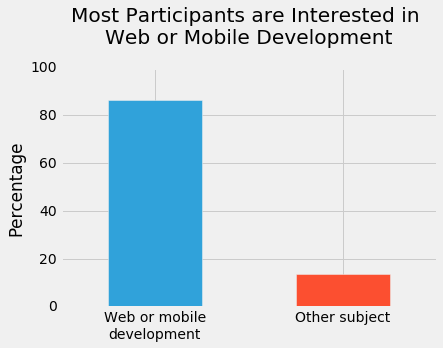

In [4]:
web_or_mobile = interests_no_nulls.str.contains('Web Developer|Mobile Developer')
freq_table = web_or_mobile.value_counts(normalize = True) * 100

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08)

plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)

plt.ylabel('Percentage')
plt.ylim(0,100)
plt.show()

It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

**Location of new coders**

Let's begin with finding out where these new coders are located, and what are the densities (how many new coders there are) for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.

We can start by examining the frequency distribution table of the CountryLive variable, which describes what country each participant lives in (not their origin country). We'll only consider those participants who answered what role(s) they're interested in, to make sure we work with a representative sample.


In [5]:
# fcc_good = fcc[fcc['JobRoleInterest'].notnull()].copy()

fcc_good = fcc[fcc['JobRoleInterest'].notnull()].copy()


absolute_frequencies = fcc_good['CountryLive'].value_counts()
relative_frequencies = fcc_good['CountryLive'].value_counts(normalize = True) * 100

pd.DataFrame (data= {'Absolute frequency': absolute_frequencies, 'Percentage':relative_frequencies })

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


From the frequency table we see that about 45% of the potenntial customers are located in USA  and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.7%, which is not too far from the United Kingdom (4.6%) or Canada (3.8%).

Now we have to find hom much money each participents are willing to pay.

** Spending limit for learning**

We'll narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. We do this for two reasons:

These are the countries having the highest frequency in the frequency table above, which means we have a decent amount of data for each.
 - Our courses are written in English, and English is an official language in all these four countries. 
 - The more people know English, the better our chances to target the right people with our ads.

In [6]:
fcc_good['MonthsProgramming'].replace(0,1, inplace= True)

fcc_good['money_per_month'] = fcc_good['MoneyForLearning'] / fcc_good['MonthsProgramming']
fcc_good['money_per_month'].isnull().sum()


675

Let's keep only those rows that don't have null value for 'money_per_month'

In [7]:
fcc_good = fcc_good[fcc_good['money_per_month'].notnull()]

We want to group the data by country, and then measure the average amount of money that students spend per month in each country. First, let's remove the rows having null values for the CountryLive column, and check out if we still have enough data for the four countries that interest us.

In [8]:
fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]

fcc_good['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

The amount of data is still quite enough to continue our analysis. So let's compute the average value spent per month in each country by a student. 

In [9]:
countries_mean = fcc_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America', 'India', 'United Kingdom',
                                  'Canada', 'Poland']      
                                    ]


CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Poland                       75.678935
Name: money_per_month, dtype: float64

The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


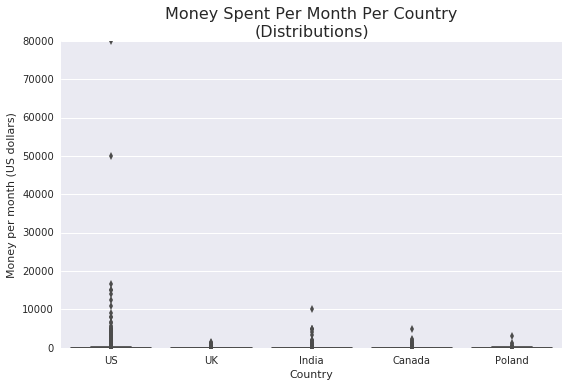

In [10]:
only_5 = fcc_good[fcc_good['CountryLive'].str.contains(
                                                'United States of America|India|United Kingdom|Canada|Poland')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_5)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(5), ['US', 'UK', 'India', 'Canada','Poland']) # avoids tick labels overlap
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month \$50000 or more for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over $20,000 per month.

In [11]:
fcc_good = fcc_good[fcc_good['money_per_month'] < 20000]

Recompute the mean value again with the lastes data.

In [12]:
countries_mean = fcc_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America', 'India', 'United Kingdom',
                                  'Canada', 'Poland']      
                                    ]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Poland                       75.678935
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


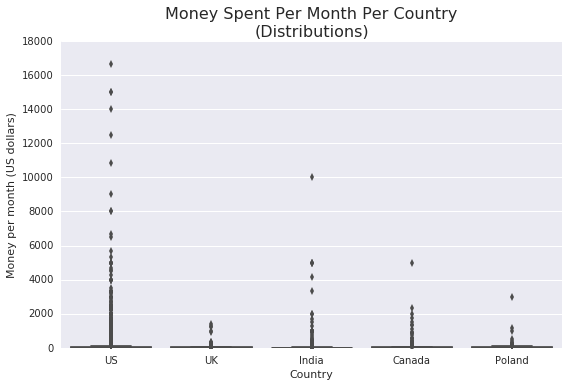

In [13]:
only_5 = fcc_good[fcc_good['CountryLive'].str.contains(
                                                'United States of America|India|United Kingdom|Canada|Poland')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_5)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(5), ['US', 'UK', 'India', 'Canada','Poland']) # avoids tick labels overlap
plt.show()

We can see a few extreme outliers for India (values over $2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

In [14]:
# Inspect the extreme outliers for India
india_outliers = only_5[
    (only_5['CountryLive'] == 'India') & 
    (only_5['money_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,Na

It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included. It seems safer to remove these two rows.

In [15]:
# Remove the outliers for India
only_5 = only_5.drop(india_outliers.index) # using the row labels

Looking back at the box plot above, we can also see more extreme outliers for the US (values over \$6000 per month). Let's examine these participants in more detail.

In [16]:
# Inspect the extreme outliers for USA
USA_outliers = only_5[
    (only_5['CountryLive'] == 'United States of America') & 
    (only_5['money_per_month'] >= 6000)]
USA_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend \$6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:

 - Didn't attend bootcamps.
 - Had been programming for three months or less when at the time they completed the survey.

In [22]:
no_bootcamp = only_5 [
                    (only_5['CountryLive'] == 'United States of America') & 
                    (only_5['money_per_month'] >= 6000) & 
                    (only_5['AttendedBootcamp'] == 0)
                    ]

only_5 = only_5.drop(no_bootcamp.index) 

# Remove the respondents that had been programming for less than 3 months
less_than_3_months = only_5[
    (only_5['CountryLive'] == 'United States of America') & 
    (only_5['money_per_month'] >= 6000) &
    (only_5['MonthsProgramming'] <= 3)
]

only_5 = only_5.drop(less_than_3_months.index)



In [23]:
# Examine the extreme outliers for Canada
canada_outliers = only_5[
    (only_5['CountryLive'] == 'Canada') & 
    (only_5['money_per_month'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [24]:
# Remove the extreme outliers for Canada
only_5 = only_5.drop(canada_outliers.index)

Let's recompute the mean values and generate the final box plots.

In [25]:
# Recompute mean sum of money spent by students each month
only_5.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
Poland                       75.678935
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


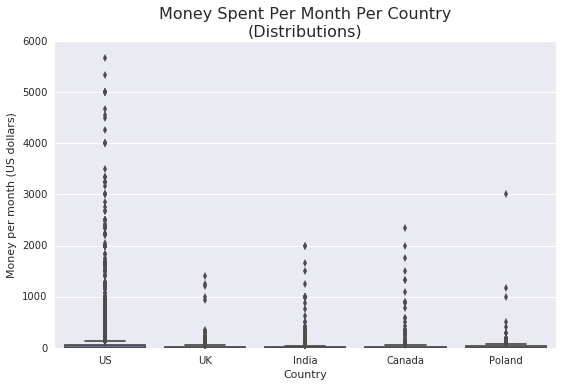

In [26]:
# Visualize the distributions again
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_5)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(5), ['US', 'UK', 'India', 'Canada', 'Poland']) # avoids tick labels overlap
plt.show()

Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly $143).

We sell subscriptions at a price of \$59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly \$93 per month, compared to India (\$66) and Poland (\$75).



In [27]:

# Frequency table for the 'CountryLive' column
only_5['CountryLive'].value_counts(normalize = True) * 100

United States of America    72.691063
India                       11.376649
United Kingdom               6.945482
Canada                       5.949714
Poland                       3.037092
Name: CountryLive, dtype: float64

So if we are choosing USA, Canada, Poland and India we can distribute the money.

1. Advertise in the US, India, and Canada and poland by splitting the advertisement budget in various combinations:

    - 60% for the US, 20% for India, 10% for Canada, 10% for Poland.
    - 50% for the US, 20% for India, 20% for Canada, 10% for Poland etc.
2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

    - 70% for the US, and 30% for India.
    - 65% for the US, and 35% for Canada; etc.
3. Advertise only in the US.

**Conclusion**

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.